In [1]:
import os
import sys
chaoseverywhere = os.path.abspath(os.path.join('..','..'))
if chaoseverywhere not in sys.path:
    sys.path.append(chaoseverywhere)
import chaoseverywhere as chaos
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
print(chaoseverywhere)

C:\Users\tangu\OneDrive\Documents\chaoseverywhere


In [3]:
chaos.logistic(3.57,0.01)

0.035343

<IPython.core.display.Javascript object>


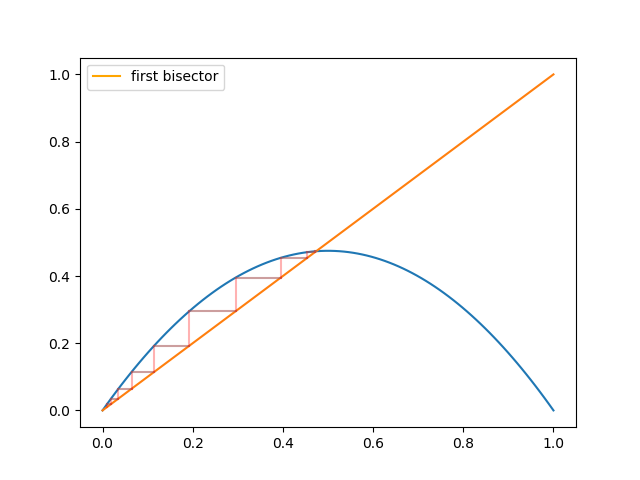

In [19]:
chaos.logistic_draw(0.01, 1.9, 100, 100)
fig = plt.gca()
plt.plot([],[], color='orange', label='first bisector')
plt.legend()
plt.show()

In [37]:
import patsy
import numpy as np
import pandas as pd  
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns 
n= np.concatenate((np.arange(10,101,10), np.arange(150,401,50)))
temps = np.array([0.14898,0.27196,0.37294,0.49092,0.62190,0.75588,0.96885,1.13682,1.21481,1.23980,1.86171,2.4862,3.20149,3.58644,4.27533,5.41315])

In [38]:
df =  pd.DataFrame({'nb_iter':n, 'temps':temps})
reg = smf.ols('temps ~ nb_iter', data=df).fit()
reg.summary()

C:\Users\tangu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  temps   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2363.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.16e-17
Time:                        12:48:49   Log-Likelihood:                 11.485
No. Observations:                  16   AIC:                            -18.97
Df Residuals:                      14   BIC:                            -17.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.048      0.155      0.879      -0.095       0.110
nb_iter        0.0127      0.000     48.614      0.000       0.012       0.013
==============================================================================
Omnibus:                        6.937   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.107
Skew:                           0.741   Prob(JB):                        0.128
Kurtosis:                       4.991   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


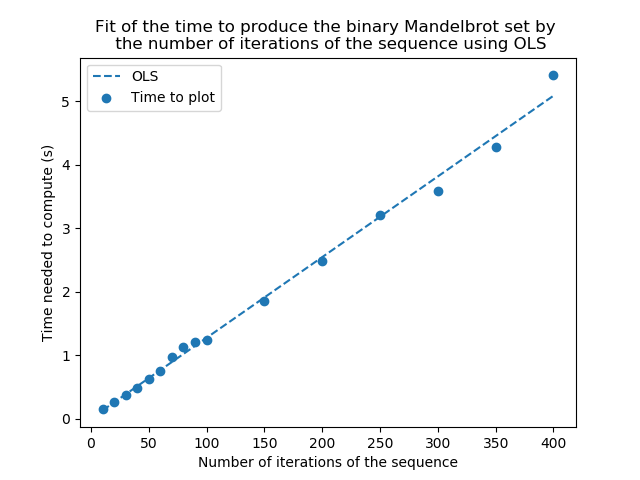

In [52]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['nb_iter'], df['temps'], label='Time to plot')
plt.xlabel('Number of iterations of the sequence')
plt.ylabel('Time needed to compute (s)')
plt.plot(df['nb_iter'], reg.predict(df), '--', label='OLS')
plt.title("Fit of the time to produce the binary Mandelbrot set by \n the number of iterations of the sequence using OLS")
plt.legend()

In [45]:
reg.predict(df)

0     0.134371
1     0.261318
2     0.388265
3     0.515213
4     0.642160
5     0.769107
6     0.896055
7     1.023002
8     1.149949
9     1.276896
10    1.911633
11    2.546369
12    3.181106
13    3.815842
14    4.450579
15    5.085315
dtype: float64